In [1]:
import sqlite3
import numpy as np
from ctypes import *
import sys
import os
import baf2sql
import matplotlib.pyplot as plt

In [2]:
path = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing\\20230710 4C_24h_1.d"

Specified BAF has 738 spectra with line and profile data.


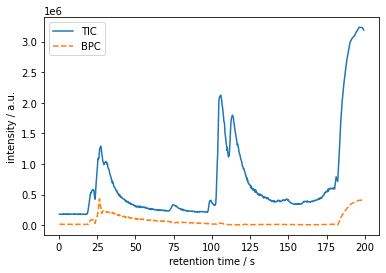

In [19]:
analysis_dir = "D:\\220701 mass spec\\220107 A 4 hrs_340688_GA1_01_82117.d"

analysis_dir = path 
if sys.version_info.major == 2:
    # note: assuming a european Windows here...
    analysis_dir = unicode(analysis_dir, 'cp1252')
    
baf_fn = os.path.join(analysis_dir, "analysis.baf")
sqlite_fn = baf2sql.getSQLiteCacheFilename(baf_fn)
conn = sqlite3.connect(sqlite_fn)

# --- Count spectra
q = conn.execute("SELECT COUNT(*) FROM Spectra "
                 "WHERE LineMzId NOT NULL AND ProfileMzId NOT NULL")
row = q.fetchone()
N = row[0]
print("Specified BAF has {} spectra with line and profile data.".format(N))

# --- Plot TIC and BPC over MS^1 spectra
q = conn.execute("SELECT Rt, SumIntensity, MaxIntensity FROM Spectra s "
                 "JOIN AcquisitionKeys ak ON s.AcquisitionKey = ak.Id "
                 "WHERE ak.MsLevel = 0 "
                 "ORDER BY s.ROWID")
data = [ row for row in q ]
rt = [ row[0] for row in data ]
tic = [ row[1] for row in data ]
bpc = [ row[2] for row in data ]

plt.figure()
plt.plot(rt, tic)
# plt.hold(True)
plt.plot(rt, bpc, '--')
plt.xlabel('retention time / s')
plt.ylabel('intensity / a.u.')
plt.legend(['TIC', 'BPC'])
plt.show()


# --- Plot spectrum with largest base-peak intensity

np_bpc = np.array(bpc, dtype = 'float')
rt0 = rt[np.nanargmax(np_bpc)]
# --- Plot mean spectrum within time window

np_bpc = np.array(bpc, dtype = 'float')

# get time window around base-peak intensity 
rt_range = rt[np.nanargmax(np_bpc) - 5: np.nanargmax(np_bpc) + 6]

spec_vals = {'profile_mz':[], 'profile_int':[], 'line_mz':[], 'line_int':[]}

for i in rt_range: 

    q = conn.execute("SELECT LineMzId, LineIntensityId, ProfileMzId, ProfileIntensityId FROM Spectra "
                    "WHERE ABS(Rt - {}) < 1e-8".format(i))
                
    row = q.fetchone()

    bs = baf2sql.BinaryStorage(baf_fn)

    if not all(row) == False: # check for None values

        bs = baf2sql.BinaryStorage(baf_fn)

        profile_mz = bs.readArrayDouble(row[2])
        profile_int = bs.readArrayDouble(row[3])

        spec_vals['profile_mz'].append(profile_mz)
        spec_vals['profile_int'].append(profile_int)


        line_mz = bs.readArrayDouble(row[0])
        line_int = bs.readArrayDouble(row[1])

        # stem() can take quite some time, so we reduce data for this example:

        max_points = 100;

        if len(line_mz) > max_points:
            line_mz = line_mz[0:max_points]
            line_int = line_int[0:max_points]
        
        spec_vals['line_mz'].append(line_mz)
        spec_vals['line_int'].append(line_int)


# convert resulting spectra values into arrays
np_profile_mz = np.array(spec_vals['profile_mz'])
np_profile_int = np.array(spec_vals['profile_int'])


In [4]:
np_data = np.array(data, dtype=np.float)
np_rt = np.array(rt, dtype=np.float)
np_tic = np.array(tic, dtype=np.float)
np_bpc = np.array(bpc, dtype=np.float)

In [17]:
tic

[179688.0,
 178538.0,
 182303.0,
 179619.0,
 179327.0,
 181300.0,
 180878.0,
 176818.0,
 176383.0,
 178987.0,
 186500.0,
 178540.0,
 187038.0,
 184385.0,
 181376.0,
 181504.0,
 179312.0,
 181934.0,
 179114.0,
 177459.0,
 186927.0,
 180406.0,
 184592.0,
 178419.0,
 175703.0,
 180830.0,
 182032.0,
 187501.0,
 182936.0,
 182555.0,
 180731.0,
 178973.0,
 182253.0,
 179861.0,
 181103.0,
 180085.0,
 177775.0,
 182885.0,
 182424.0,
 187341.0,
 181452.0,
 184545.0,
 181351.0,
 183437.0,
 179284.0,
 177488.0,
 176986.0,
 177591.0,
 185154.0,
 176690.0,
 179921.0,
 176683.0,
 182971.0,
 180346.0,
 184978.0,
 175875.0,
 178401.0,
 181397.0,
 177840.0,
 179643.0,
 177841.0,
 182543.0,
 178911.0,
 180447.0,
 181900.0,
 178507.0,
 179447.0,
 175693.0,
 178111.0,
 175667.0,
 183003.0,
 179882.0,
 180934.0,
 193439.0,
 215869.0,
 251323.0,
 294260.0,
 337509.0,
 389134.0,
 426822.0,
 496730.0,
 498633.0,
 532787.0,
 531396.0,
 558419.0,
 563023.0,
 565236.0,
 582104.0,
 571348.0,
 573870.0,
 564964.0,

In [6]:
data2.dtype

NameError: name 'data2' is not defined

In [ ]:
plt.plot(data2[:, 0], data2[:, 1])

In [ ]:
from unidec_modules.v3_SeqChrom import * 
from unidec_modules import unidectools as ud
eng = SeqChrom()
data2 = np.array(np_data[:, :2], dtype = np.float)
data2=data2[~np.isnan(data2).any(axis=1)]
data2[:, 0] = data2[:, 0]/60
eng.tic = eng.ticdat = data2

In [ ]:
plt.plot(data2[:, 0], data2[:, 1])

In [ ]:
lb = 0.5
ub = 3.0
eng.config.chrom_peak_width = 0.6
eng.get_chrom_peaks(lb = lb, ub=ub)

In [ ]:
self = eng
times = self.chrompeaks_tranges
for i, t in enumerate(times):
    min, max = t[0], t[1]
    minscan = ud.nearest(self.ticdat[:, 0], min)
    
    if self.ticdat[minscan, 0] < min:
        minscan += 1
    maxscan = ud.nearest(self.ticdat[:, 0], max)
    if self.ticdat[maxscan, 0] > max:
        maxscan -= 1
    if maxscan <= minscan:
        maxscan = minscan + 1
    self.scans = [minscan, maxscan, min, max]
    attrs = {"timestart": min, "timeend": max,
                 "timemid": (min + max) / 2.,
                 "scanstart": minscan, "scanend": maxscan,
                 "scanmid": (minscan + maxscan) / 2.}
    self.attrs = attrs